# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [15]:
#install.packages("kohonen")
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

[1] 210   6

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

In [2]:
help(som)

[[1]]
           V1         V2         V3          V4          V5         V6
V1 -0.9886188 -0.9781013 -0.9019465 -1.03530414  0.58627308 -0.6501815
V2 -0.2283528 -0.2662925 -0.3806364 -0.05836485 -1.00338847 -0.7207314
V3  0.4408228  0.5056410  0.5036363  0.41627012  0.16727905  0.5296840
V4  1.4241054  1.4172464  1.4136546  1.30530125 -0.07328373  1.4307335



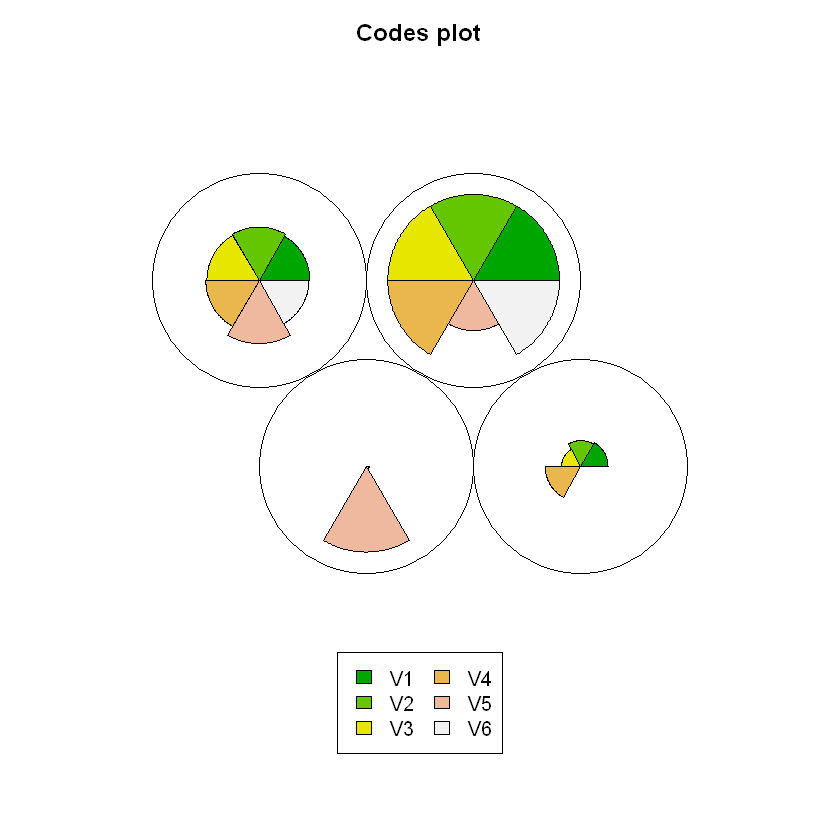

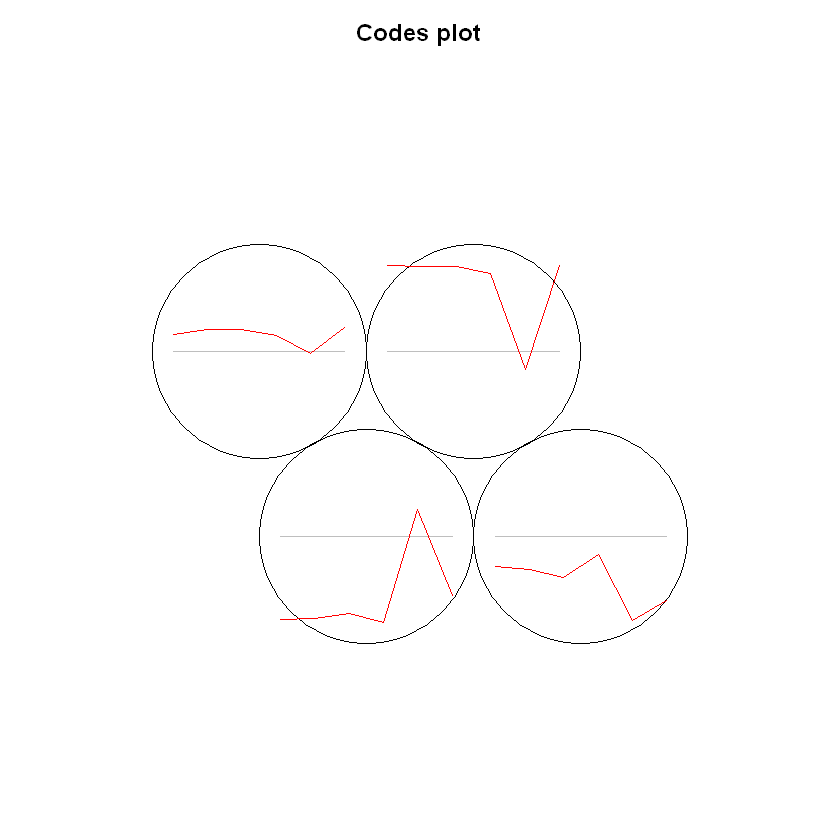

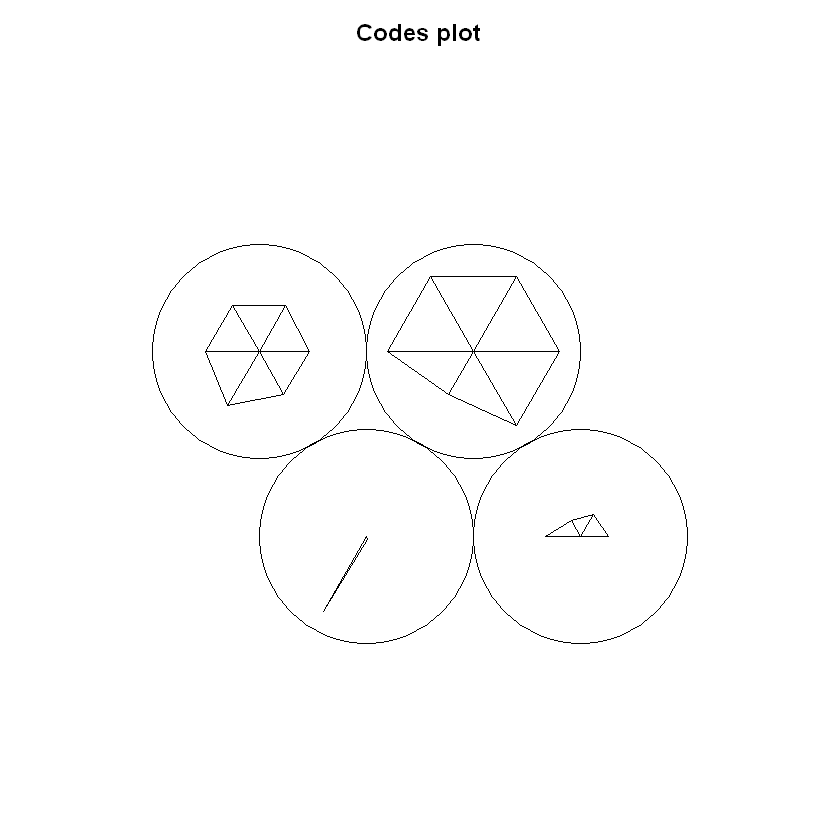

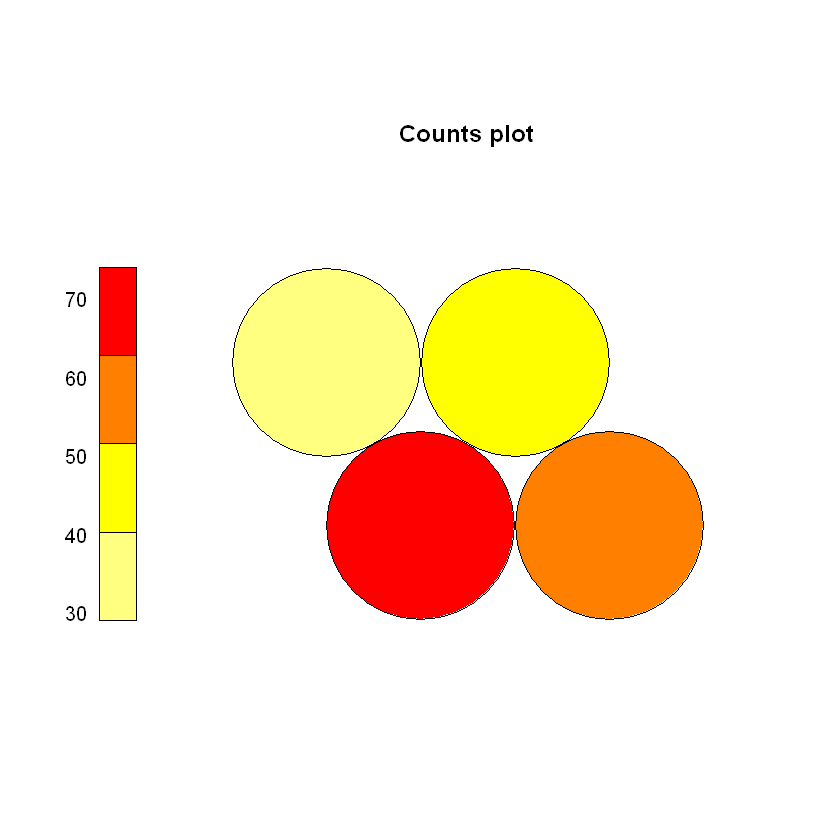

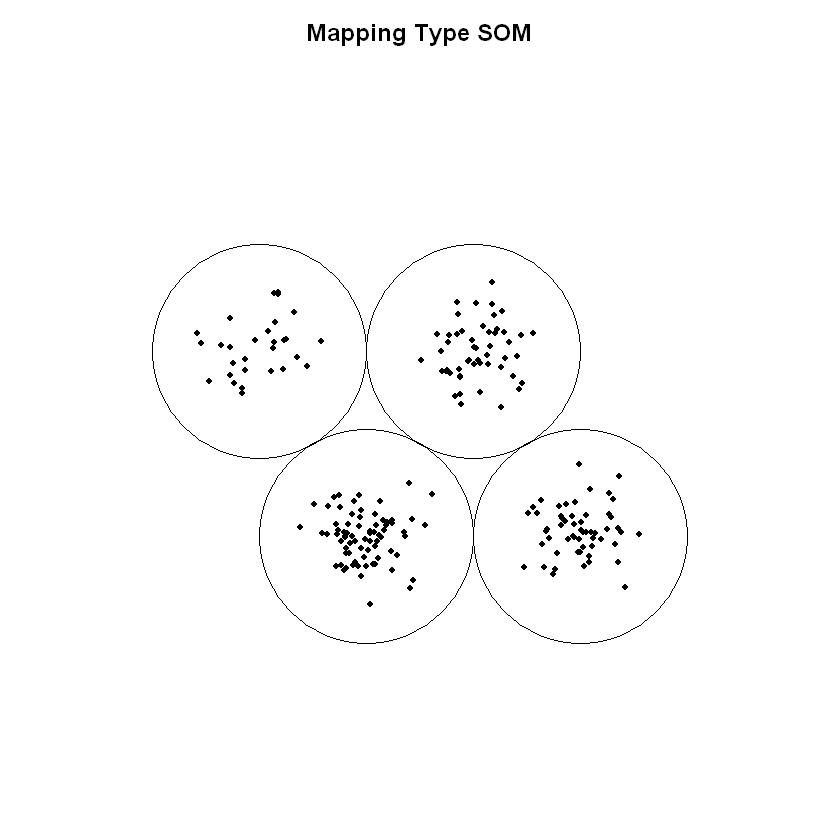

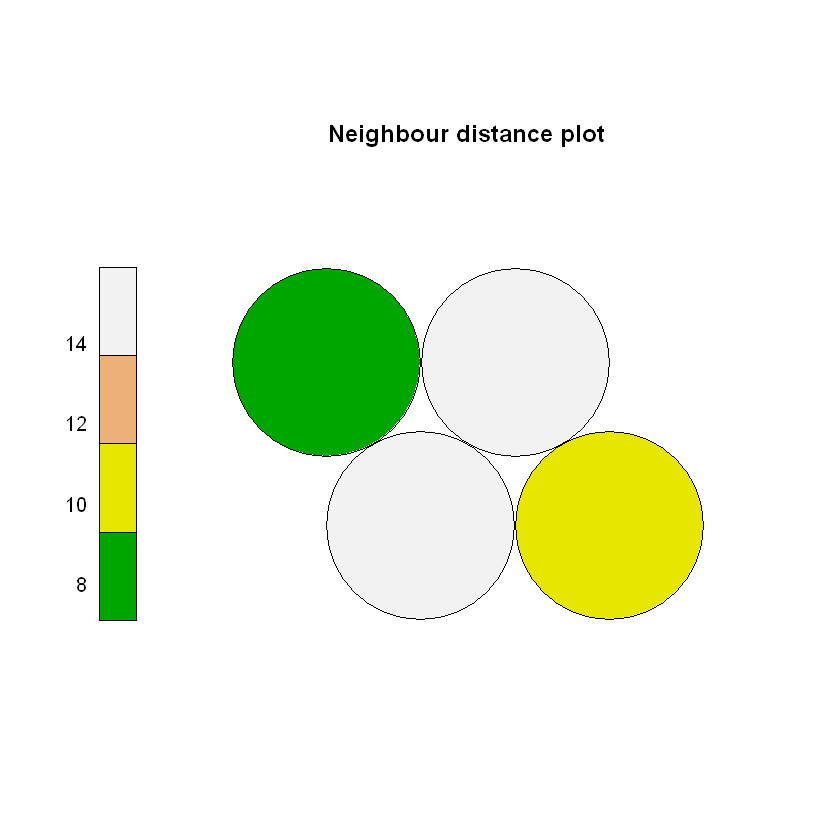

In [3]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


**Ejercicio 1:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

### Respuesta Ejercicio 1 
**(a)**
El método som ajusta una red neuronal pre-alimentada, cuya salida es un mapa característico en 2D (compuesto de una malla de nodos)y la entradas son datos de alta dimensionalidad. Para ello utiliza el algoritmo de autoorganización de kohonen y la distancia euclidiana entre los nodos del mapa característico.
Los principales parámetros del método son:
- data: matriz en que cada fila representa una observación
- grid: el tipo de malla en el mapa característico
- rlen: el número de veces que el conjunto entero de datos es utilizado para ajustar la red neuronal. Por omisión es 100.
- alpha: tasa de aprendizaje, vector con el rango en cual variar linealmente la tasa de aprendizaje
- radius: radio de activación 
- init: valores iniciales de los pesos de la red. Por omisión se escogen aleatorios en el rango de los datos.

La salida es un objeto de la clase kohonen, cuyas principales componentes son:
   
- grid: la malla, un objeto de la clase "somgrid".
- codes: una matriz con los pesos de  cada nodo del mapa característico
- changes: un vector con la media de las distancias entre nodos vecinos en cada iteración. Representan una medida del ajuste de la red. 
- unit.classif: nodos activados por cada observación. Sólo se retorna si keep.data == TRUE.
- distances: distancia de la observación al nodo activado.  Sólo se retorna si keep.data == TRUE.


Los gráficos desplegados muestra respectivamente:
1) los tres primeros gráficos son representaciones de los pesos de cada variable en los nodos (codes)
2) el número de observaciones por nodo (el nodo que se activa con dicha observación)
3) el lugar dónde se ubican las distintas observaciones respecto de cada nodo en el mapa característico
4) la distancia unificada entre nodos vecinos, que para cada nodo se calcula como un promedio de las distancias entre pares de datos originales: donde un elemento del par activa el nodo seleccionado y el otro elemento activa un nodo vecino. 

**(b)** Es posible graficar changes, variando el valor de rlen y podemos ver que en este caso se logra convergencia desde 200 iteraciones.
Distintas configuraciones del mapa, representan mas o menos grupos a definir.

[[1]]
           V1          V2         V3         V4         V5         V6
V1  0.5692003  0.63164345  0.5996397  0.5437823  0.1392611  0.6570552
V2 -1.0330387 -1.00266739 -0.8945699 -1.1197475  0.4849783 -0.5960992
V3 -0.8225947 -0.85010675 -0.8276524 -0.7121290  1.8645697 -0.6247908
V4  1.4651547  1.44581849  1.4336520  1.3561070 -0.1610531  1.4437294
V5 -0.0696517 -0.08968375 -0.1997416  0.0853126 -0.7318586 -0.6073260
V6 -0.8482247 -0.92247812 -1.0301788 -0.7146367 -1.0095002 -1.1084659

  [1] 1 4 1 2 5 5 1 5 4 6 2 5 1 1 4 2 2 1 1 2 2 4 5 2 2 1 3 5 5 4 5 6 2 5 1 4 4
 [38] 2 5 2 2 3 4 5 3 4 4 2 3 2 4 6 5 2 5 5 1 5 4 3 5 4 6 5 4 6 4 5 1 3 4 5 1 4
 [75] 5 4 5 4 5 1 4 6 5 5 4 2 6 5 2 2 2 3 6 2 5 2 4 2 2 3 3 2 1 6 5 5 5 5 5 5 4
[112] 6 2 3 2 5 5 1 2 5 2 4 2 2 4 4 5 5 1 5 6 2 2 4 1 4 3 5 4 1 4 2 4 2 2 4 2 3
[149] 4 4 2 5 2 3 2 2 4 5 2 5 4 4 4 1 5 1 3 5 2 2 5 2 3 1 1 1 4 6 4 3 3 4 6 5 5
[186] 4 4 4 4 2 2 6 2 4 4 2 3 6 3 1 4 2 5 2 5 2 1 1 6 4


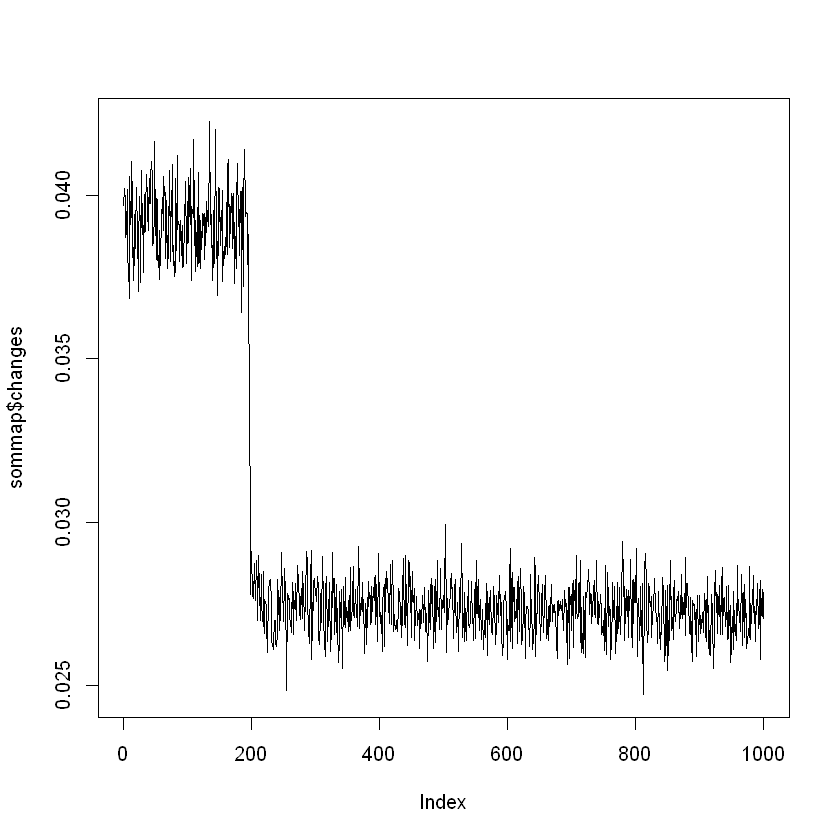

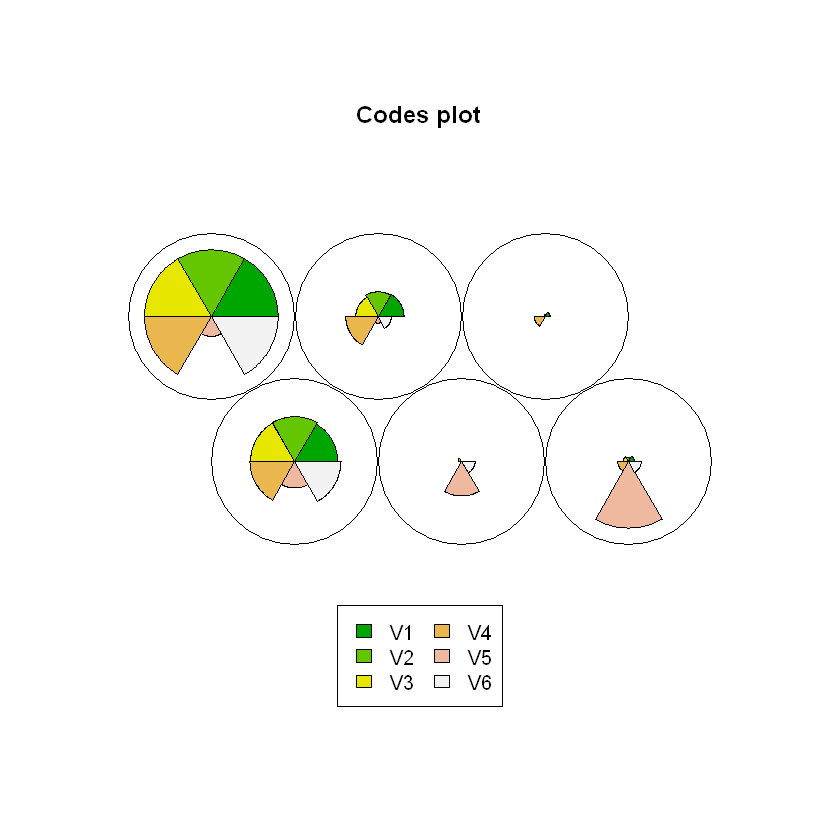

In [4]:
sommap <- som(scale(datos),rlen=1000, grid = somgrid(3,2, "hexagonal"), keep.data=TRUE)
print(sommap$codes)
plot(sommap$changes, type="l")
print(sommap$unit.classif)

plot(sommap)

[[1]]
           V1         V2         V3         V4          V5         V6
V1 -1.0313546 -1.0155363 -0.9184375 -1.0916247  0.87107777 -0.6557233
V2 -0.2303663 -0.2526556 -0.3319491 -0.1065407 -0.89301756 -0.6186679
V3  1.2539122  1.2654505  1.2642558  1.1336883 -0.03804938  1.3131782

  [1] 3 3 2 1 2 2 2 2 3 2 1 2 3 3 3 1 1 3 3 1 1 3 2 1 1 3 1 2 2 3 2 2 1 2 3 3 3
 [38] 1 2 1 2 1 3 2 1 3 3 1 1 1 3 1 2 1 2 2 3 2 3 1 2 3 1 2 3 2 3 2 3 1 3 2 3 3
 [75] 2 3 2 3 2 3 3 2 2 2 3 1 2 2 1 2 1 1 2 1 2 1 3 1 1 1 1 1 3 2 2 2 2 2 2 2 3
[112] 2 1 1 1 2 2 3 1 2 1 3 1 1 3 3 2 2 3 2 2 1 1 3 3 3 1 2 3 2 3 1 3 1 1 3 1 1
[149] 3 3 1 2 1 1 1 2 3 2 1 2 3 3 3 2 2 2 1 2 1 1 2 1 1 2 3 3 3 2 3 1 1 3 1 2 2
[186] 3 3 3 3 1 1 2 1 3 3 1 1 1 1 3 3 1 2 1 2 1 3 3 2 3


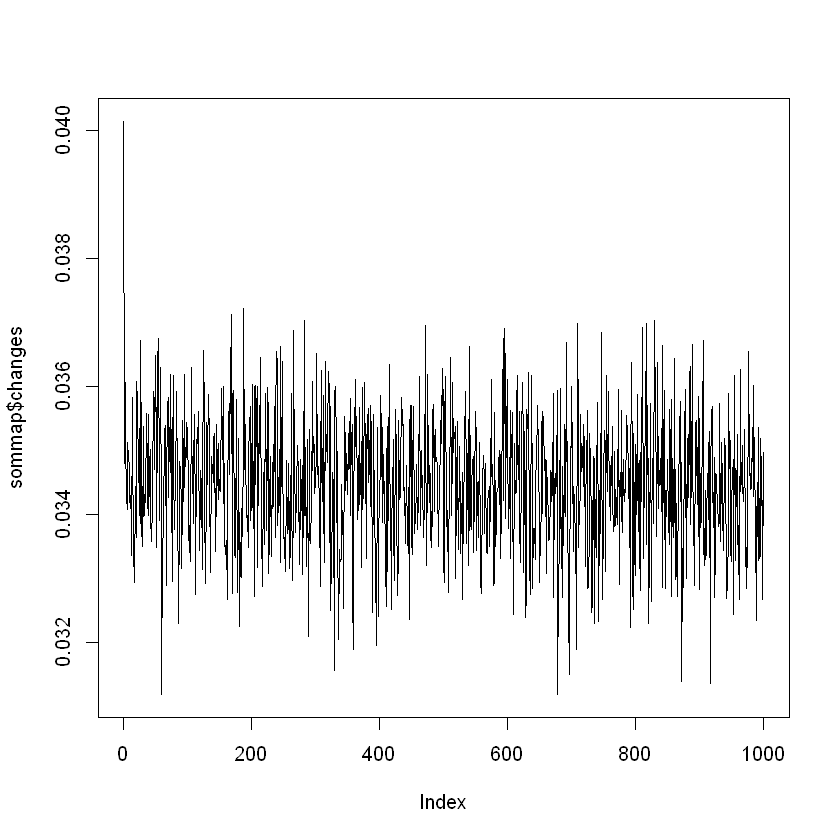

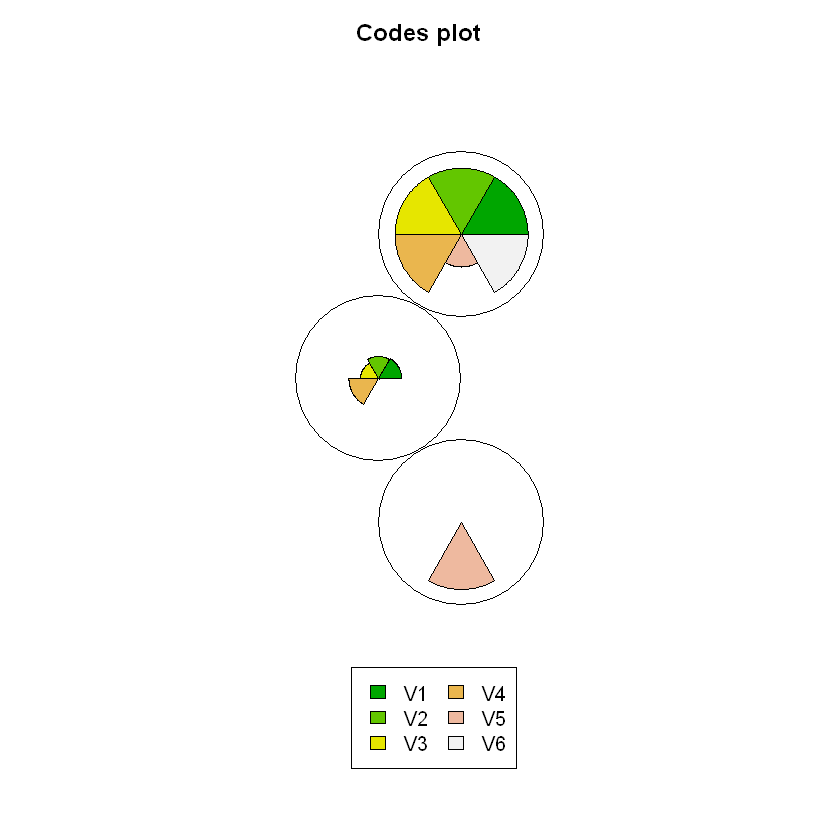

In [5]:
##create SOM grid
set.seed(7)
sommap <- som(scale(datos),rlen=1000, grid = somgrid(1,3, "hexagonal"), keep.data=TRUE)
print(sommap$codes)
plot(sommap$changes, type="l")
print(sommap$unit.classif)

plot(sommap)

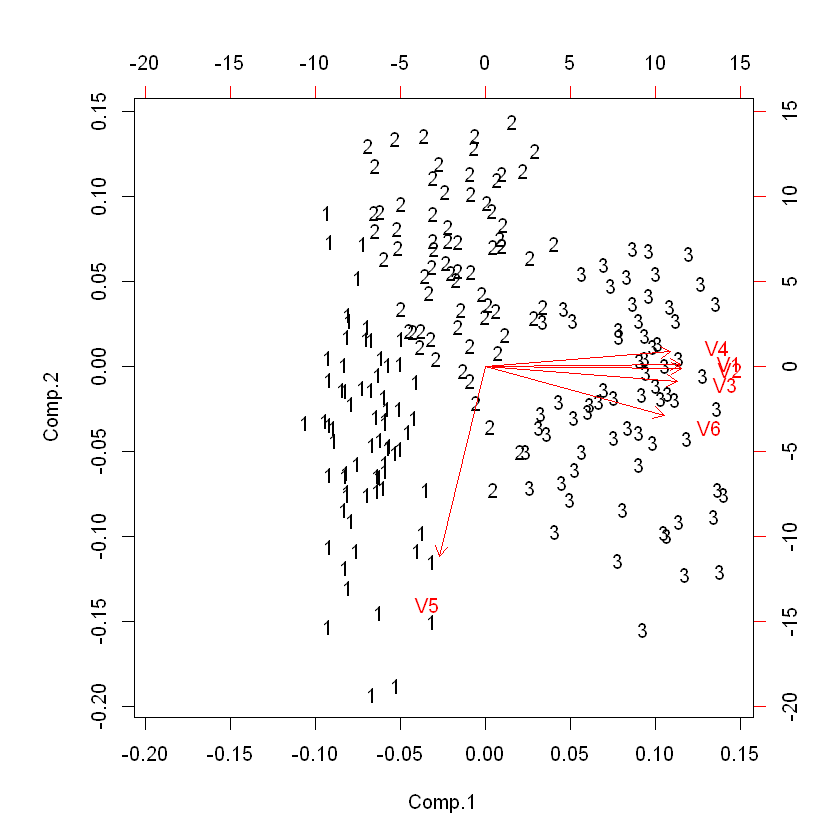

In [6]:
res <- princomp(datos, cor=TRUE)
cl <- sommap$unit.classif
biplot(res,xlabs=cl)

#### **Ejercicio 2:**

a) Explique como funciona esta nueva visualización. Interprete y comente los resultados obtenidos.

b) Complete el Ejercicio 4 de la tarea anterior con el agrupamiento que genera el método som con K=3. Compare los resultados de la medida de calidad con los otros tres métodos de clustering. Concluya.

#### Respuesta Ejercicio 2: 
**a)** 
Esta visualización grafica las observaciones etiquetadas con el grupo asignado por SOM junto a las variables originales en el primer plano principal. Se observa un comportamiento similar  a los obtenidos con los otros métodos de agrupamiento desarrollados en las sesiones anteriores. Se distingue el grupo 1 con valores medios de todas las variables, el grupo 2 con valores medios a pequeños de todas las variables, el grupo 3 con valores pequeños de  las variables V1, V2, V3 , V4 y V6 y mayores valores de V5 y por último el grupo 4 con mayores valores de todas las variables a excepción de V5.

**b)** La comparación de las redes de Kohonen con los otros 3 métodos de agrupamiento muestra que es un método competitivo y que se ubica con respecto a la medida Purity en el segundo lugar después de GMM en el análisis de los datos de semillas.

In [7]:
purity <- function(clusters, clases) {
  sum(apply(table(clases, clusters), 2, max)) / length(clusters)
}

In [8]:
library(mclust)
library(cluster)
datos1 <-read.table("..//data//semillas.txt",dec=".")
summary(datos1)
cl1 <- kmeans(datos,3,iter.max=1000,nstart=10)$cluster
cl2 <- Mclust(datos, G=3)$classification
cl3 <- cutree(hclust(dist(datos), method="average"),3)
cl4 <- som(scale(datos),rlen=1000, grid = somgrid(3,1, "hexagonal"), keep.data=TRUE)$unit.classif
tab1 <-table(datos1$V7, cl1)
tab2 <-table(datos1$V7, cl2)
tab3 <- table(datos1$V7, cl3)
tab4 <- table(datos1$V7, cl4)
tab1
tab2
tab3
tab4

Warning message:
"package 'mclust' was built under R version 3.6.3"Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.

Attaching package: 'mclust'

The following object is masked from 'package:kohonen':

    map

Warning message:
"package 'cluster' was built under R version 3.6.3"

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6              V7   
 Min.   :0.765   Min.   :4.519   Min.   :1  
 1st Qu.:2.562   1st Qu.:5.045   1st Qu.:1  
 Median :3.599   Median :5.223   Median :2  
 Mean   :3.700   Mean   :5.408   Mean   :2  
 3rd Qu.:4.769   3rd Qu.:5.877   3rd Qu.:3  
 Max.   :8.456   Max.   :6.550   Max.   :3  

   cl1
     1  2  3
  1 60  9  1
  2 10  0 60
  3  2 68  0

   cl2
     1  2  3
  1  0 13 57
  2 68  0  2
  3  0 70  0

   cl3
     1  2  3
  1 66  1  3
  2  6 64  0
  3  9  0 61

   cl4
     1  2  3
  1 60  2  8
  2  5 65  0
  3  5  0 65

In [9]:
purity(datos1$V7, cl1)
purity(datos1$V7, cl2)
purity(datos1$V7, cl3)
purity(datos1$V7, cl4)

[1] 0.8952381

[1] 0.9285714

[1] 0.9095238

[1] 0.9047619

#### **Ejercicio 3:**

Considere el subconjunto de datos del archivo tiposMusica.csv que ha estudiado en las tareas anteriores.

a) Realice el análisis de agrupamiento con SOM y discuta sus resultados

b) Escoja alguno de los otros métodos de agrupamiento estudiado en esta unidad y compare sus resultados con la medida de calidad de su preferencia y considerando la etiqueta del tipo de música disponible en la primera columna de datos. Discuta sus resultados.

In [10]:
datosC <- read.csv("..//data//tiposMusica.csv",header=TRUE,sep=";",dec=".")
datosC[1:10,c(1,4:14)]

genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Classical,14,0.942,0.350,79333,0.0761,0.00e+00,0.1560,-22.003,0.0352,140.044,0.0293
Classical,13,0.991,0.236,261000,0.0753,3.15e-03,0.0858,-23.232,0.0426,122.973,0.3000
Classical,2,0.994,0.240,48000,0.2510,9.58e-01,0.1020,-11.310,0.0394,99.234,0.1600
Classical,32,0.996,0.387,136293,0.0222,9.22e-01,0.1200,-29.504,0.1400,112.360,0.0687
Classical,29,0.994,0.358,154147,0.2050,1.45e-05,0.1490,-13.588,0.0430,87.696,0.5180
Classical,25,0.993,0.470,70987,0.2040,9.15e-01,0.1180,-21.667,0.0653,138.257,0.0398
Classical,0,0.644,0.415,64760,0.0197,0.00e+00,0.1970,-34.225,0.0369,74.338,0.2280
Classical,0,0.993,0.380,297372,0.0414,9.23e-01,0.1130,-22.443,0.0350,75.241,0.5470
Classical,23,0.993,0.332,219947,0.2300,8.72e-01,0.1110,-23.125,0.0620,99.962,0.0356
Classical,17,0.982,0.173,86401,0.1020,3.49e-02,0.1460,-24.937,0.0387,86.998,0.3350


In [11]:
sommap <- som(scale(datosC[,4:14]),rlen=1000, grid = somgrid(3,1, "hexagonal"), keep.data=TRUE)

[[1]]
   popularity acousticness danceability duration_ms     energy instrumentalness
V1 -0.4032116    0.8746848   -0.4932664  -0.1572733 -0.8428230        0.6186641
V2  0.1109553   -0.6366928   -0.4497785  -0.1762754  0.6588966       -0.9281800
V3  0.3489056   -0.7461969    0.4588877   0.2117873  0.8435312       -0.3996503
     liveness   loudness speechiness      tempo       valence
V1 -0.3429733 -0.8712088   0.3000231  0.2412310  0.0009926804
V2  2.7743201  0.5829873   0.1138398  0.5374068  0.4882651848
V3 -0.0796201  0.7951682  -0.1425130 -0.3108336 -0.0940878841



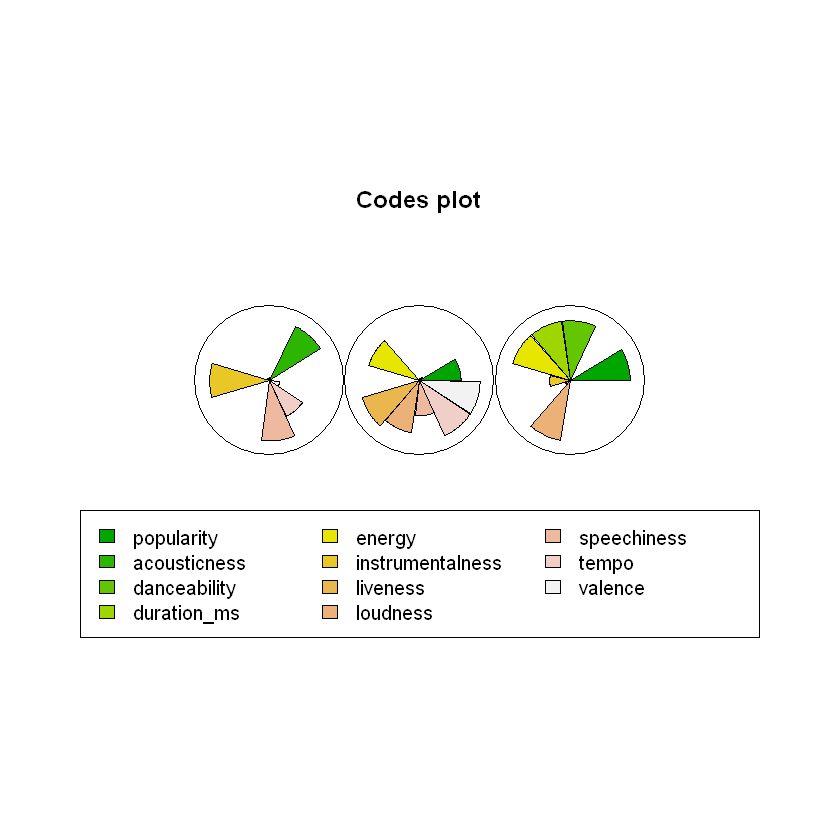

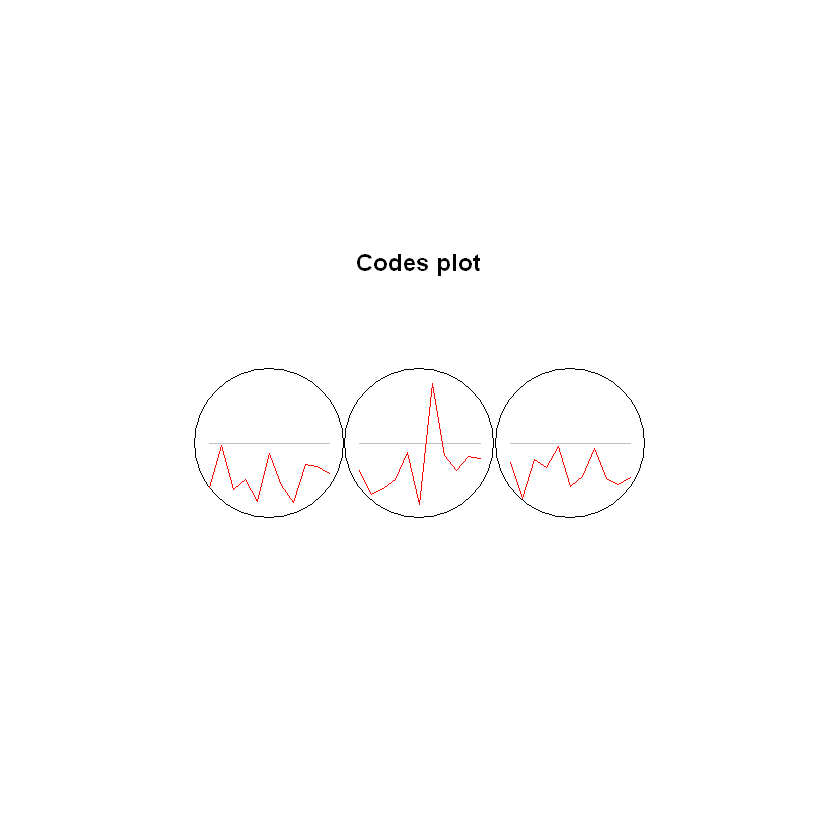

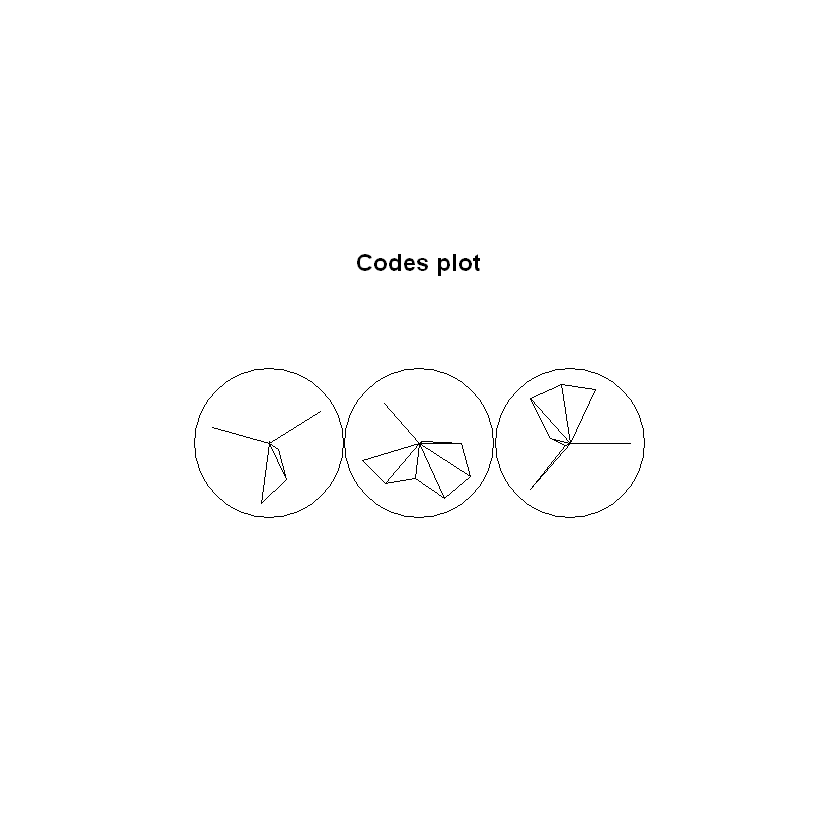

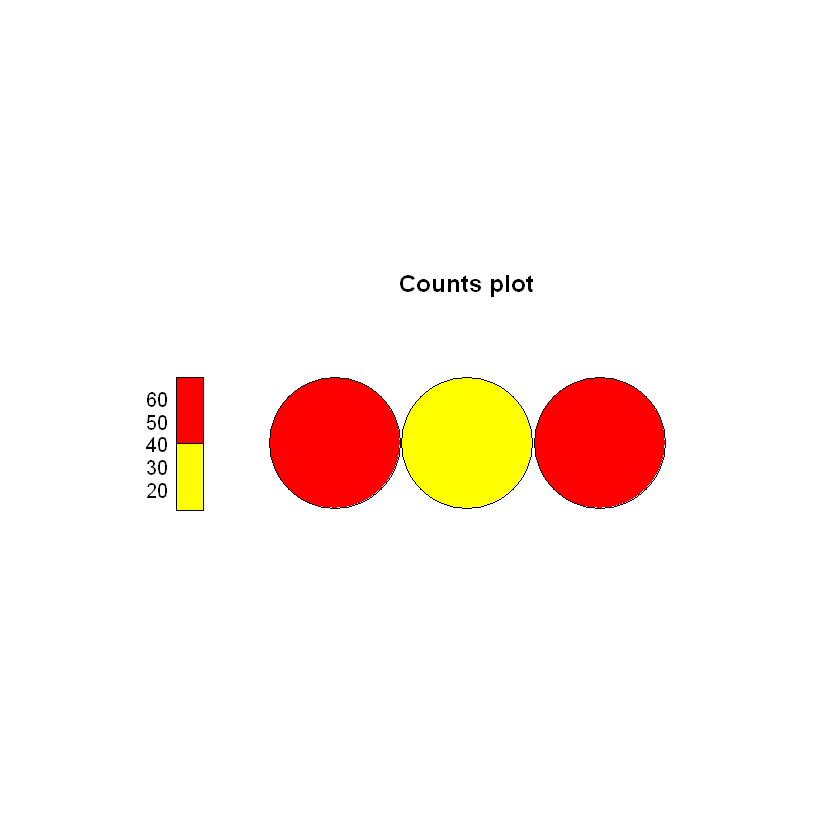

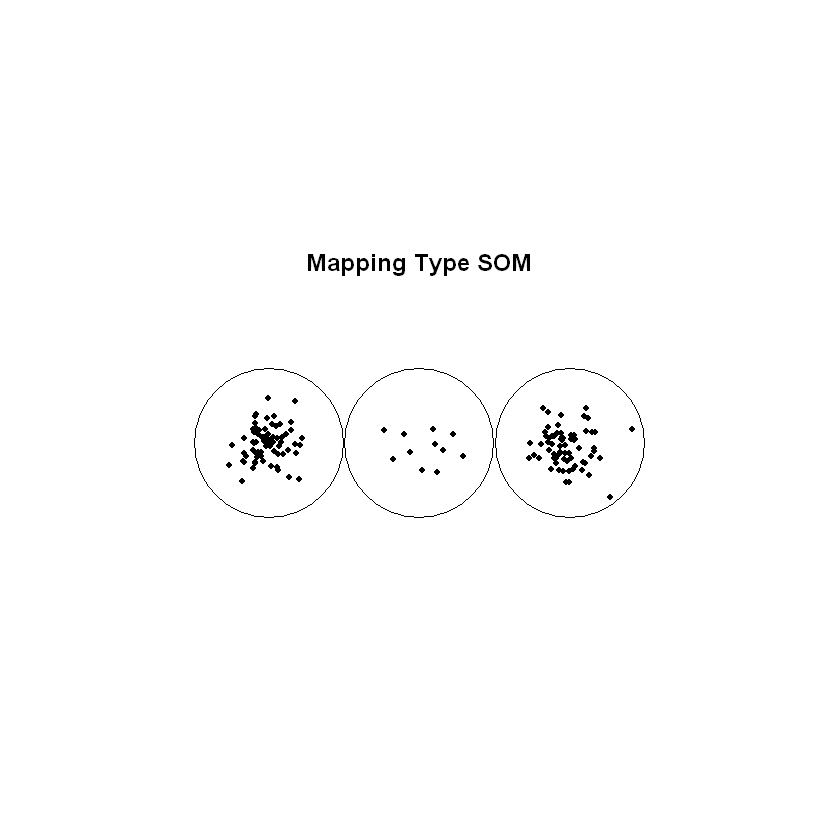

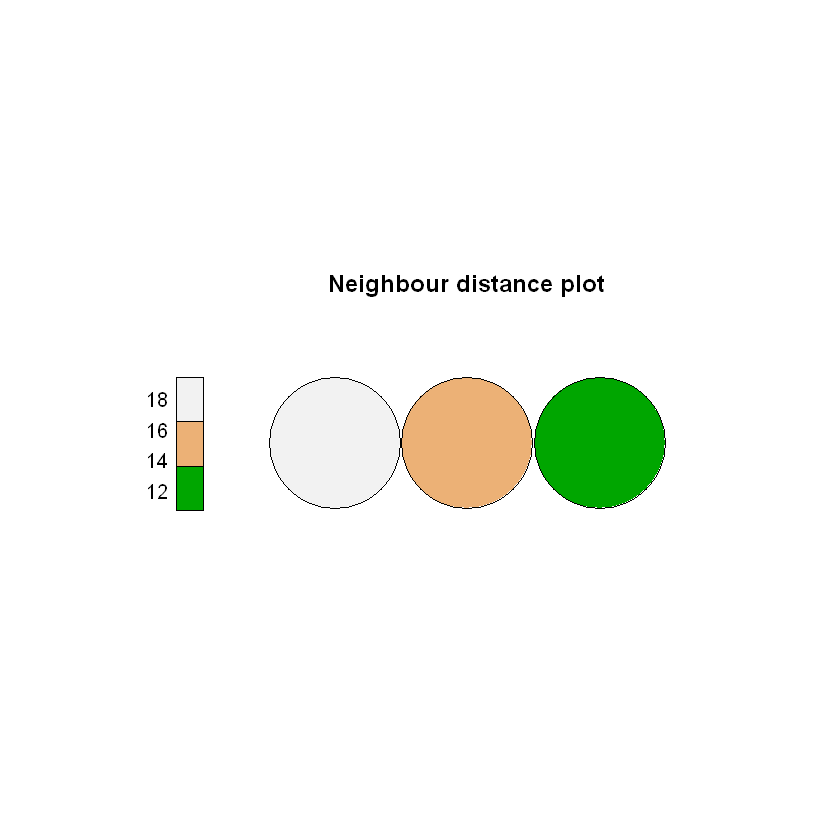

In [12]:
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

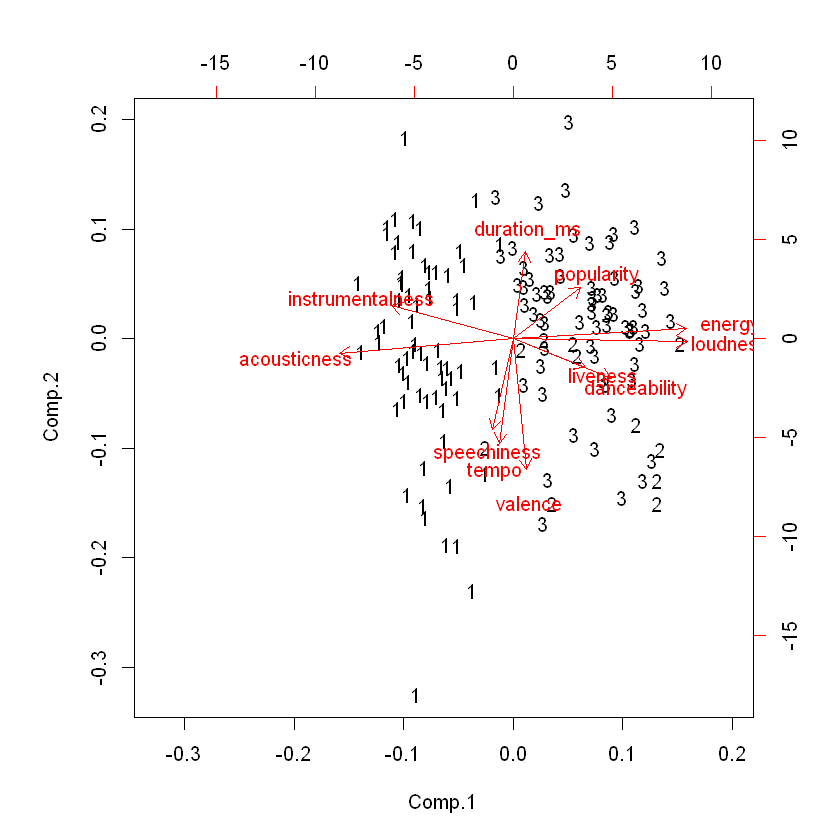

In [16]:
res <- princomp(datosC[,4:14], cor=TRUE)
cl <- sommap$unit.classif
biplot(res,xlabs=cl)

In [21]:
purity <- function(clusters, clases) {
  sum(apply(table(clases, clusters), 2, max)) / length(clusters)
}

tab <- table(cl,datosC[,1])
tab
purity(cl,datosC[,1])



   
cl  Classical Electronic Rock
  1        67          1    1
  2         3          4    4
  3         1         34   34

[1] 0.704698

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVI (diagonal, equal volume, varying shape) model with 3 components: 

 log-likelihood   n df       BIC       ICL
      -3139.174 149 66 -6608.609 -6614.845

Clustering table:
 1  2  3 
63 45 41 

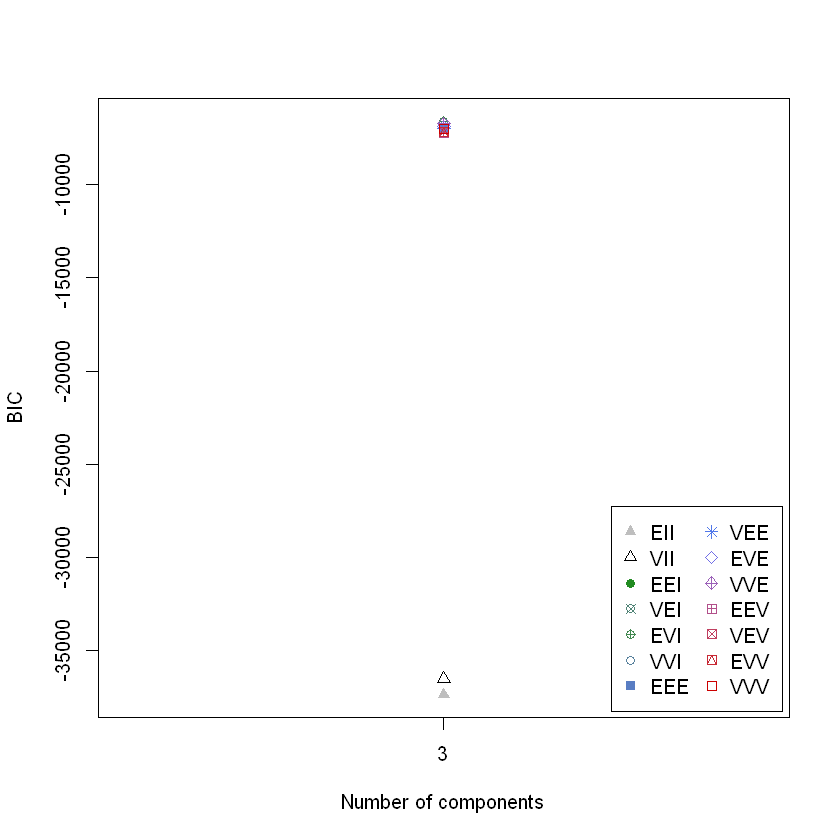

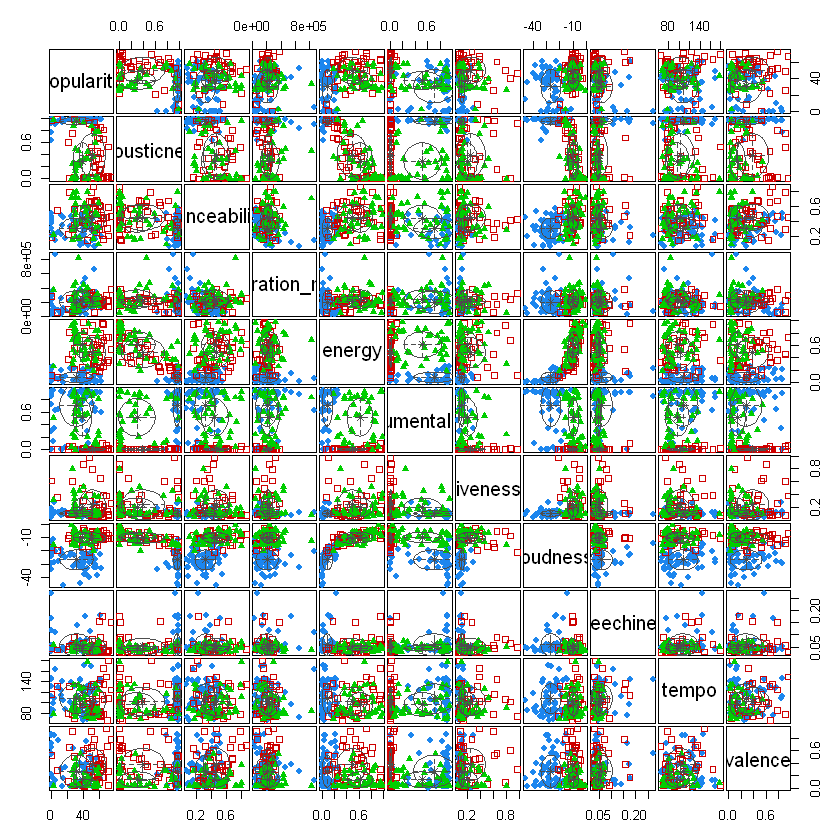

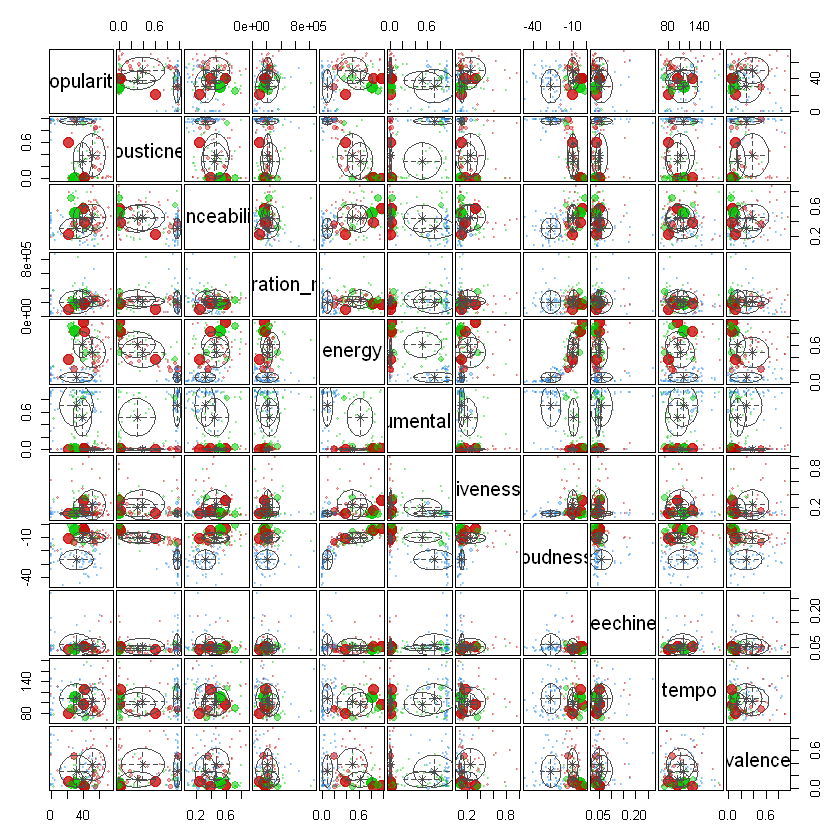

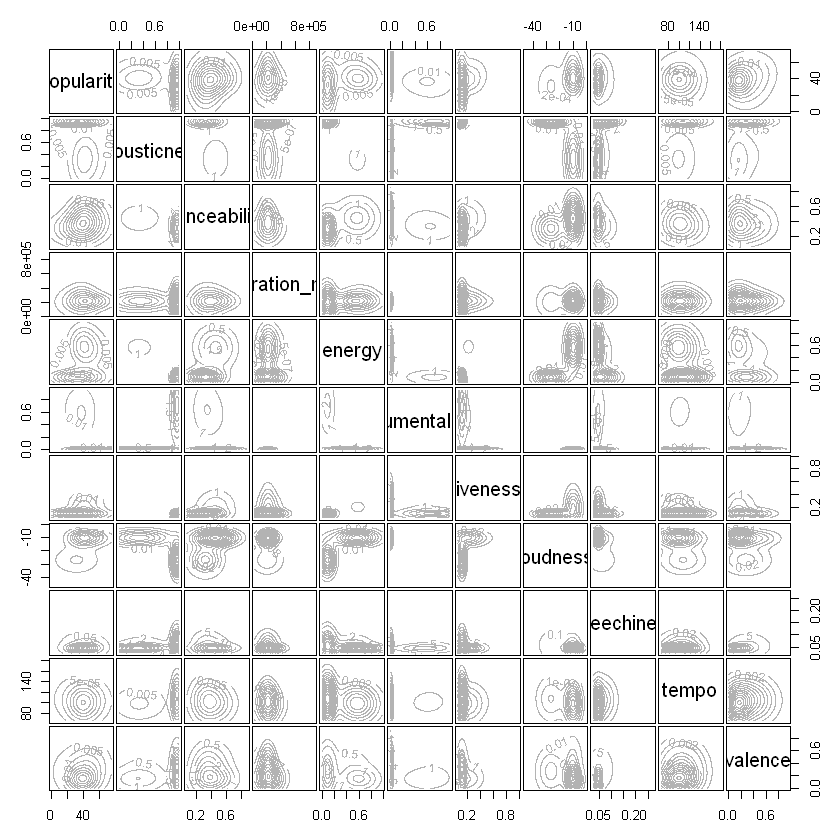

In [25]:
clus <-Mclust(datosC[,4:14],G=3)
summary(clus)
plot(clus)
cl <- clus$classification



In [26]:
tab1 <- table(cl,datosC[,1])
tab1
purity(cl,datosC[,1]) 

   
cl  Classical Electronic Rock
  1        63          0    0
  2         5          8   32
  3         3         31    7

[1] 0.8456376

#### Respuestas Ejercicio 3
**a)** El análiais con SOM de los datos estudiados previamente,muestra una calidad de agrupamiento levemente mejor que k-means en cuanto a discriminar las regiones de cada género de música con una medida de Purity de 0.705

**b)** Si consideramos el agrupamiento proporcionado por GMM vemos que aumenta drásticamente la calidad del mismo.